In [1]:
import platform
from datetime import datetime

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

print("Start time: {:%d.%m.%Y %H:%M}".format(datetime.now()))
print("using:")
print("   python version:     {0}".format(platform.python_version()))
print("   numpy version:      {0}".format(np.__version__))
print("   matplotlib version: {0}".format(matplotlib.__version__))
print("   torch version:      {0}".format(torch.__version__))

Start time: 07.06.2019 12:50
using:
   python version:     3.7.3
   numpy version:      1.16.2
   matplotlib version: 3.0.3
   torch version:      1.1.0


In [2]:
encoder =nn.Sequential(
    nn.Linear(28*28,200),
    nn.Sigmoid(),
    nn.Linear(200,50),
    nn.Sigmoid(),
    nn.Linear(50,3),
    nn.Sigmoid()
)
decoder = nn.Sequential(
    nn.Linear(3,50),
    nn.Sigmoid(),
    nn.Linear(50,200),
    nn.Sigmoid(),
    nn.Linear(200,28*28),
    nn.Sigmoid()
)
net = nn.Sequential(
    encoder,
    decoder
)

In [3]:
print(net)

for key in net.state_dict():
    value = net.state_dict().get(key)
    print(key, value.size(), value.numel())

Sequential(
  (0): Sequential(
    (0): Linear(in_features=784, out_features=200, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=200, out_features=50, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=50, out_features=3, bias=True)
    (5): Sigmoid()
  )
  (1): Sequential(
    (0): Linear(in_features=3, out_features=50, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=50, out_features=200, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=200, out_features=784, bias=True)
    (5): Sigmoid()
  )
)
0.0.weight torch.Size([200, 784]) 156800
0.0.bias torch.Size([200]) 200
0.2.weight torch.Size([50, 200]) 10000
0.2.bias torch.Size([50]) 50
0.4.weight torch.Size([3, 50]) 150
0.4.bias torch.Size([3]) 3
1.0.weight torch.Size([50, 3]) 150
1.0.bias torch.Size([50]) 50
1.2.weight torch.Size([200, 50]) 10000
1.2.bias torch.Size([200]) 200
1.4.weight torch.Size([784, 200]) 156800
1.4.bias torch.Size([784]) 784


In [4]:
mnistDataset = datasets.MNIST('./data',download=True,train=True, transform=transforms.ToTensor())
validationSize = len(mnistDataset)/6
trainSize = len(mnistDataset) - validationSize
trainDataset, validationDataset = torch.utils.data.random_split(mnistDataset, [int(trainSize), int(validationSize)])

In [5]:
batch_size = 100
trainLoader = DataLoader(trainDataset, batch_size = batch_size, shuffle = True)
testLoader = DataLoader(validationDataset, batch_size = batch_size)
dataLoaders = {'train': trainLoader, 'test': testLoader}

In [6]:
lossFunction = nn.MSELoss()
print("lossFunction:", end = ' ')
print(lossFunction)
#print('\n')
optimizer = torch.optim.Adam(net.parameters())
print("optimizer:", end = ' ')
print(optimizer)

lossFunction: MSELoss()
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)


In [12]:
from mpl_toolkits.mplot3d import Axes3D
def plot():
    net.eval()
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    col = np.array([], dtype=np.int64)
    x = np.array([])
    y = np.array([])
    z = np.array([])
    for i, (images, label) in enumerate(dataLoaders['test']):
    #print(' epoc {0:0d} batch {1:0d}'.format(epoc, i))
    #if i == 100:
    #    break
        with torch.no_grad():
            out = encoder(images.view(-1,28*28))

        x = np.append(x, out.numpy()[:,0])
        y = np.append(y, out.numpy()[:,1])
        z = np.append(z, out.numpy()[:,2])
        col = np.append(col, label.numpy())
    ax.scatter(x,y,z, marker='o',c=col,cmap='tab10',picker=True)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_zlim(0,1)
    
    
    #fig.savefig("./autoencoder/image{0:03d}.png".format(epoc))
    plt.show()
    #plt.close(fig)

 train epoc 0 batch 499 loss    0.06063 
 0.06083684787154198


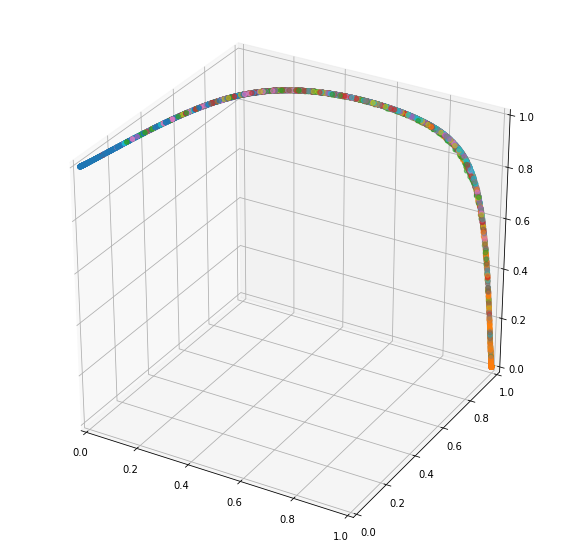

 train epoc 1 batch 499 loss    0.05988 
 0.05976179242134094


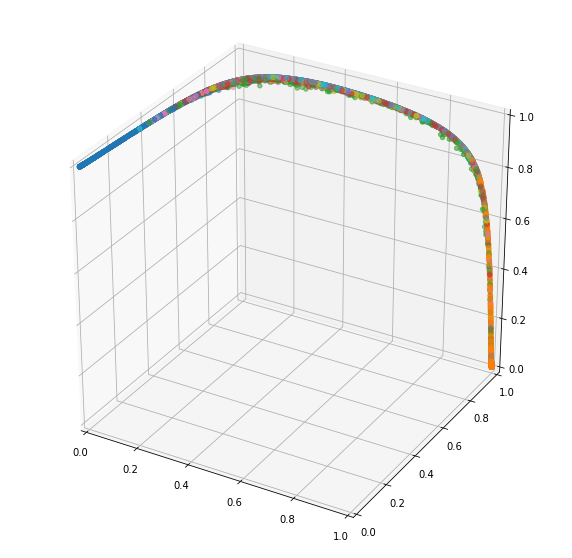

 train epoc 2 batch 499 loss    0.05772  
 0.0567878857254982


 train epoc 3 batch 499 loss    0.05218 
 0.05244135111570358


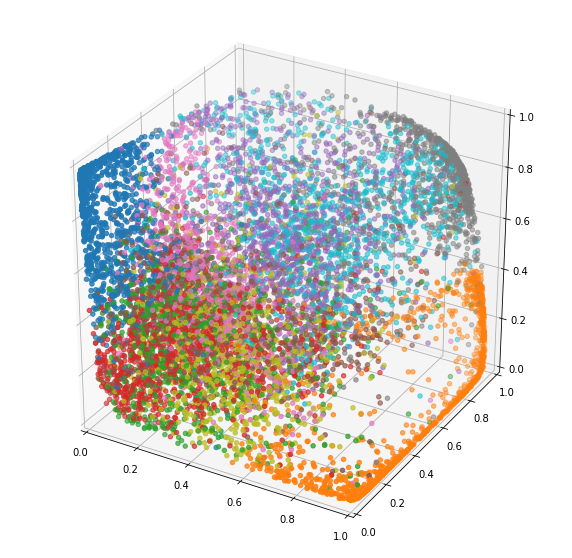

 train epoc 4 batch 499 loss    0.04715 
 0.05170096457004547


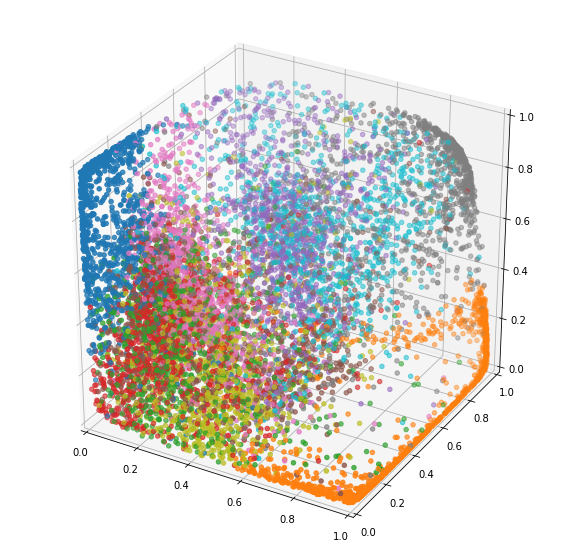

 train epoc 5 batch 499 loss    0.04766  
 0.04913122206926346


 train epoc 6 batch 499 loss    0.04656 
 0.04841051250696182


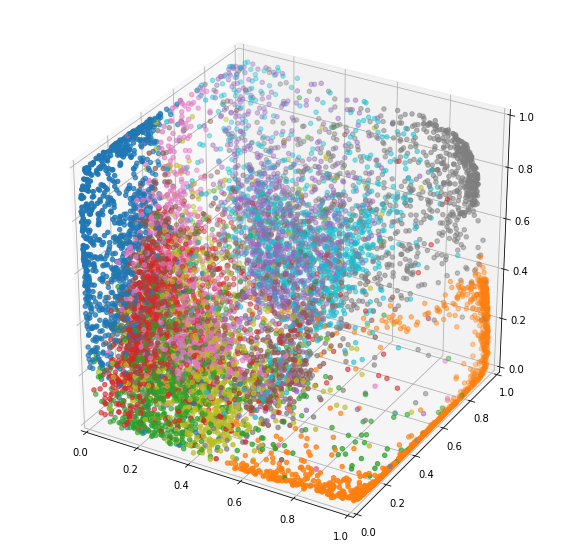

 train epoc 7 batch 499 loss    0.04707 
 0.046960193663835526


 train epoc 8 batch 499 loss    0.04688 
 0.04694241285324097


 train epoc 9 batch 499 loss    0.04634   
 0.04579635709524155


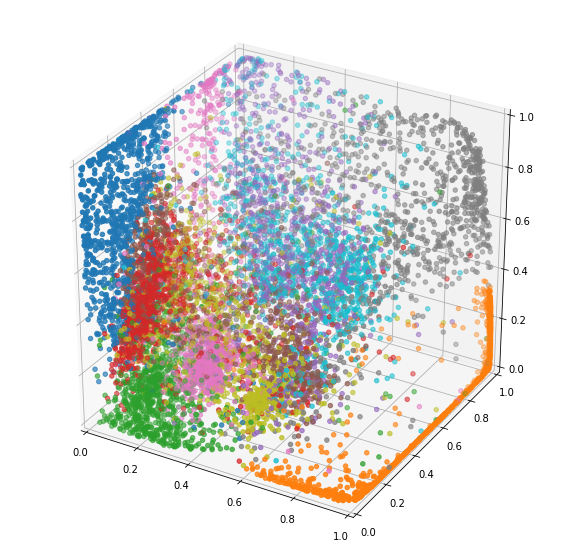

In [14]:
epocs = 10
for epoc in range(epocs):
    print('epoc {0:0d} train '.format(epoc), end='')
    
    loss = 0
    epoc_loss = 0
    for i, (images, label) in enumerate(dataLoaders['train']):
        print('\r train epoc {0:0d} batch {1:0d} loss {2:10.5f}'.format(epoc, i, loss), end = ' ')
        
        net.train()
        net.zero_grad()
        out = net(images.view(-1,28*28))
        loss = lossFunction(out,images.view(-1,28*28))
        
        epoc_loss += loss
        epoc_loss /= 2.
        loss.backward()
        optimizer.step()
    print('\n', epoc_loss.item())
    plot()